In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Olympische Spelen

Het doel van dit rapport is het achterhalen en presenteren van gegevens over de behaalde medailles uit de olympische spelen van 2016. Verder moet voor Nederland een voorspelling gemaakt worden voor het aantal medailles in 2020.

In [3]:
df = pd.read_csv("OlympischeSpelen2016.csv", sep = ";",  encoding = "ISO-8859-1")
df.head(5)

,Land,Goud,Zilver,Brons
0,ALGERIA,0,2,0
1,ARGENTINA,3,1,0
2,ARMENIA,1,3,0
3,AUSTRALIA,8,11,10
4,AUSTRIA,0,0,1


In [4]:
df['Totaal'] = df['Goud'] + df['Zilver']  + df['Brons']
df.head(5)

,Land,Goud,Zilver,Brons,Totaal
0,ALGERIA,0,2,0,2
1,ARGENTINA,3,1,0,4
2,ARMENIA,1,3,0,4
3,AUSTRALIA,8,11,10,29
4,AUSTRIA,0,0,1,1


In [5]:
#Totaal aantal behaalde medailles =
totaal = df['Totaal'].sum()
max = df['Totaal'].max()
gem = df['Totaal'].mean()
print("Totaal = " , totaal)
print("Maximaal = " , max)
print("Gemiddelde = " , gem)

Totaal =  974
Maximaal =  121
Gemiddelde =  11.195402298850574


In [6]:
top = df.sort_values('Totaal', ascending=[0]).iloc[0]["Land"]
print("Land met het meeste aantal medailles = ", top)

Land met het meeste aantal medailles =  UNITED STATES


In [7]:
newdf = df.sort_values('Totaal', ascending=[0]).reset_index(drop=True)
plaatsNL = newdf[newdf['Land'] == 'NETHERLANDS']
plaatsNL

,Land,Goud,Zilver,Brons,Totaal
12,NETHERLANDS,8,7,4,19


In [8]:
dfDOSTop10 = df.iloc[0:10]
dfDOSRest = df[10:].sum()
dfTotaal = df.sum()
dfNew = dfDOSTop10.append(dfDOSRest, ignore_index = True)
dfDOSNew = dfNew.append(dfTotaal, ignore_index = True)
dfDOSNew


,Land,Goud,Zilver,Brons,Totaal
0,ALGERIA,0,2,0,2
1,ARGENTINA,3,1,0,4
2,ARMENIA,1,3,0,4
3,AUSTRALIA,8,11,10,29
4,AUSTRIA,0,0,1,1
5,AZERBAIJAN,1,7,10,18
6,BAHAMAS,1,0,1,2
7,BAHRAIN,1,1,0,2
8,BELARUS,1,4,4,9
9,BELGIUM,2,2,2,6


In [9]:
newtable = df.sort_values('Totaal', ascending=[0]).reset_index(drop=True)


newrow = pd.Series({'Land' : 'Remaining',
           'Goud' : newtable['Goud'][10:].sum(),
           'Zilver' : newtable['Zilver'][10:].sum(),
           'Brons' : newtable['Brons'][10:].sum(),
           'Totaal' : newtable['Totaal'][10:].sum()})

total = pd.Series({'Land' : 'Totaal',
           'Goud' : newtable['Goud'].sum(),
           'Zilver' : newtable['Zilver'].sum(),
           'Brons' : newtable['Brons'].sum(),
           'Totaal' : newtable['Totaal'].sum()})
tussen = newtable.iloc[0:10].append(newrow, ignore_index = True)
tussen.iloc[0:11].append(total, ignore_index = True)

,Land,Goud,Zilver,Brons,Totaal
0,UNITED STATES,46,37,38,121
1,CHINA,26,18,26,70
2,GREAT BRITAIN,27,23,17,67
3,RUSSIAN FEDERATION,19,18,19,56
4,FRANCE,10,18,14,42
5,GERMANY,17,10,15,42
6,JAPAN,12,8,21,41
7,AUSTRALIA,8,11,10,29
8,ITALY,8,12,8,28
9,CANADA,4,3,15,22


In [10]:
%matplotlib inline

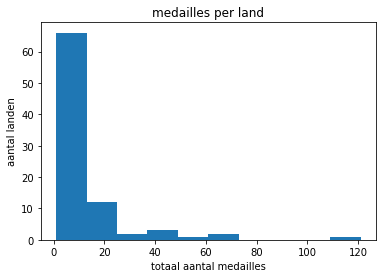

In [11]:
plt.hist(df['Totaal'])
plt.xlabel("totaal aantal medailles")
plt.ylabel("aantal landen")
plt.title("medailles per land")
#Dit is geen normale verdeling

In [12]:
xlsx = pd.read_excel("OlympischeSpelenNederland.xlsx")
xlsx.head(5)

,Jaar,Goud,Zilver,Brons
0,1900,0,1,3
1,1904,0,0,0
2,1908,0,0,2
3,1912,0,0,3
4,1920,4,2,5


In [13]:
xlsx['Totaal'] = xlsx['Goud'] + xlsx['Zilver']  + xlsx['Brons']
xlsx.head(5)

,Jaar,Goud,Zilver,Brons,Totaal
0,1900,0,1,3,4
1,1904,0,0,0,0
2,1908,0,0,2,2
3,1912,0,0,3,3
4,1920,4,2,5,11


In [14]:
jaar1980 = xlsx[xlsx['Jaar'] >= 1980]
jaar1980

,Jaar,Goud,Zilver,Brons,Totaal
17,1980,0,1,2,3
18,1984,5,2,6,13
19,1988,2,2,5,9
20,1992,2,6,7,15
21,1996,4,5,10,19
22,2000,12,9,4,25
23,2004,4,9,9,22
24,2008,7,5,4,16
25,2012,6,6,8,20
26,2016,8,7,4,19


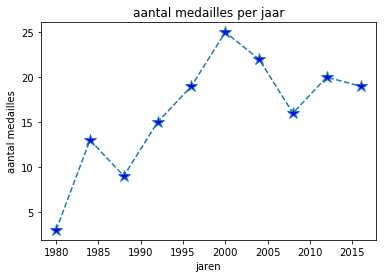

In [15]:
plt.plot(jaar1980['Jaar'],jaar1980['Totaal'], linestyle='--',
        marker='*', markerfacecolor='blue', markersize=12)
plt.xlabel("jaren")
plt.ylabel("aantal medailles")
plt.title("aantal medailles per jaar")

In [16]:
from sklearn import linear_model

# Scikit-learn verwacht alleen nummerieke waarden, dus Jaar ook omzetten
xlsx['Jaar'] = xlsx['Jaar'].astype(int)

# Scikit-learn verwacht 1 of meerdere variabelen in de vorm van een dataframe:
X = jaar1980[['Jaar']]

# Scikit-learn verwacht de uitkomstwaarden als lijst
y = jaar1980.Totaal

# Scikit-learn: maken van het lineare regressie model
lm = linear_model.LinearRegression()
# berekenen van de formule
lm.fit(X, y)

# bepaling van de coëefficiënten van de formule
constante = lm.intercept_
jaarfactor = lm.coef_[0]

print('De formule is: Aantal leerlingen = {0:.1f} + {1:.1f} * Jaartal '.format(constante,jaarfactor))


De formule is: Aantal leerlingen = -755.9 + 0.4 * Jaartal 


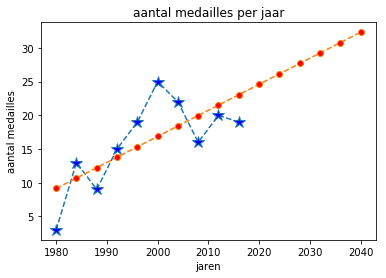

In [17]:
jaren = {'Jaar' : [1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024,2028,2032,2036,2040]}
pX = pd.DataFrame(jaren)
voorspelling = lm.predict(pX)
plt.plot(jaar1980['Jaar'],jaar1980['Totaal'], linestyle='--',
        marker='*', markerfacecolor='blue', markersize=12)
plt.plot(pX['Jaar'],voorspelling, linestyle='--',
        marker='.', markerfacecolor='red', markersize=12)
plt.xlabel("jaren")
plt.ylabel("aantal medailles")
plt.title("aantal medailles per jaar")


In [18]:
med1980 = jaar1980.iloc[0]['Totaal']
ber1980 = constante + (jaarfactor * 1980)

print('Controle voor 1980: {0:.0f}'.format(ber1980) )
print('Dit ligt niet heel dicht bij de werkelijke waarde: {0:.0f}'.format(med1980))
print('')

score = lm.score(X, y)
print("De score van {0:.3f} (op een maximum van 1.0) geeft aan dat de formule niet erg nauwkeurig is.".format(score,100.0*score))

Controle voor 1980: 9
Dit ligt niet heel dicht bij de werkelijke waarde: 3

De score van 0.520 (op een maximum van 1.0) geeft aan dat de formule niet erg nauwkeurig is.
